In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import LeakyReLU

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,14))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(X_train[i],cmap="gray")
    ax.set_title(y_train[i])
    ax.axis("off")

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
def relu(x):
    if x > 0:
        return x
    else:
        return 0
    
def Leakyrelu(x):
    if x > 0:
        return x
    else:
        return 0.01*x

In [8]:
X_train.shape[2]

28

In [46]:
inputs = layers.Input((28,28))
x = layers.Flatten()(inputs)
#x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(10, activation="softmax")(x)
outputs = x
model = tf.keras.models.Model(inputs, outputs)

In [47]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile('adam', 'sparse_categorical_crossentropy',['sparse_categorical_crossentropy'])

In [50]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 52us/sample - loss: 2.4551 - sparse_categorical_crossentropy: 2.4551 - val_loss: 0.4549 - val_sparse_categorical_crossentropy: 0.4549
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3487 - sparse_categorical_crossentropy: 0.3487 - val_loss: 0.3042 - val_sparse_categorical_crossentropy: 0.3042
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2650 - sparse_categorical_crossentropy: 0.2650 - val_loss: 0.2530 - val_sparse_categorical_crossentropy: 0.2530
Epoch 4/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2420 - sparse_categorical_crossentropy: 0.2420 - val_loss: 0.2750 - val_sparse_categorical_crossentropy: 0.2750
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2212 - sparse_categorical_crossentropy: 0.2212 - val_loss: 0.2407 - val_sparse_categori

In [51]:
loss6= history.history['loss']
loss6

[2.455079075921032,
 0.34866785983219745,
 0.26498512447153527,
 0.24198526479216914,
 0.2211679188179473,
 0.21003803349832695,
 0.1988208034735794,
 0.19448525942160438,
 0.1893062539918814,
 0.18221628612167357]

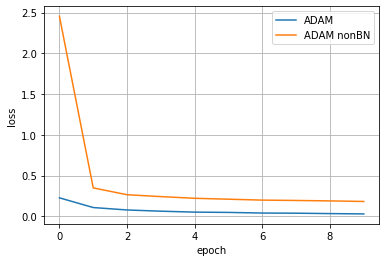

In [53]:
nb_epoch = len(loss1)
plt.plot(range(nb_epoch), loss1, label='ADAM')
plt.plot(range(nb_epoch), loss6, label='ADAM nonBN')

plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
import numpy as np
y_pred_prob= model.predict(X_test)

In [16]:
y_pred = np.argmax(y_pred_prob, axis=-1)
print(y_pred_prob.shape, y_pred.shape)

(10000, 10) (10000,)


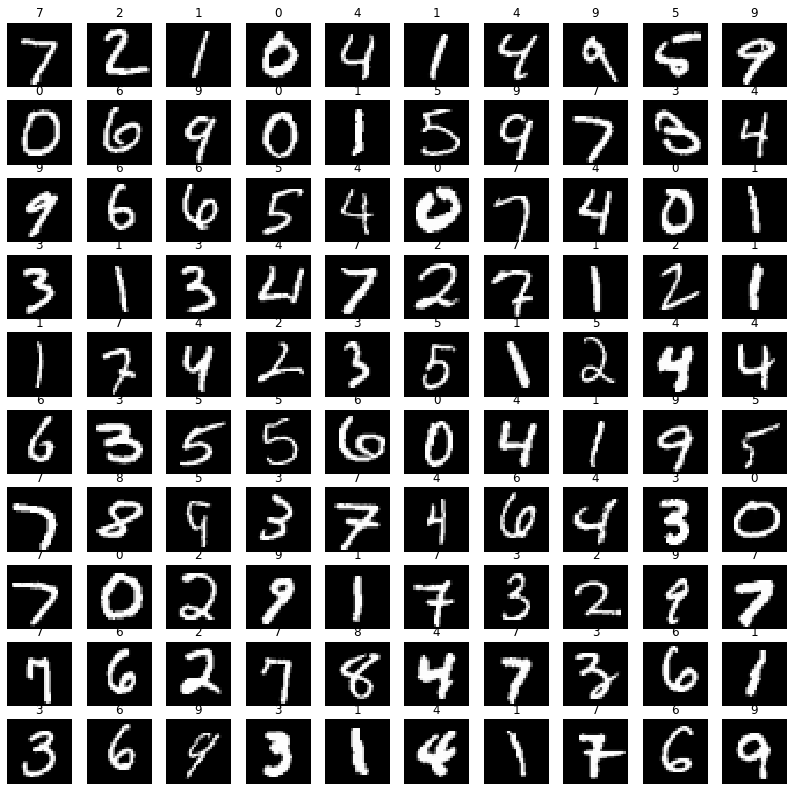

In [17]:
fig = plt.figure(figsize=(14,14))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(X_test[i],cmap="gray")
    ax.set_title(y_pred[i])
    ax.axis("off")

In [18]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation

#model = Sequential()
#model.add(Dense(128, input_dim=784))
#model.add(Activation('relu'))
#model.add(Dense(10))
#model.add(Activation('softmax'))

In [19]:
#model.summary()